# 100 days code challange

# Time Series Analysis



You can see the source of this data here: https://trends.google.com/trends/explore?date=today%205-y&q=climate%20change

Here we will explore using **AR and ARMA models**
for modelling this Google trends data, specifically searches of '**climate change**' over the last 5 years worlwide. We will then explore methods for testing the model fits and the forecasts.

In [46]:
 #Import libraries
import re
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.api import tsa
from statsmodels.tsa.arima.model import ARIMA

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.ar_model import ar_select_order, AutoReg
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
#load dataframe 
data = pd.read_csv('climate_change.csv')
data.head()

,Category: All categories,Unnamed: 1
0,NaN,NaN
1,Week,climate change: (Worldwide)
2,12/05/2019,4
3,19/05/2019,3
4,26/05/2019,3


In [29]:
#skipping first two rows 
data = pd.read_csv('climate_change.csv', skiprows = 2)
data.head()

,Week,climate change: (Worldwide)
0,12/05/2019,4
1,19/05/2019,3
2,26/05/2019,3
3,02/06/2019,3
4,09/06/2019,3


In [30]:
data.dtypes

Week                           object
climate change: (Worldwide)     int64
dtype: object

In [31]:
#Week column to datetime format

data['Week'] = pd.to_datetime(data['Week'],  format='%d/%m/%Y')
# Now 'Week' to be index 
data.dropna()
data.set_index('Week', inplace = True)
data = data['climate change: (Worldwide)']
data.head()

Week
2019-05-12    4
2019-05-19    3
2019-05-26    3
2019-06-02    3
2019-06-09    3
Name: climate change: (Worldwide), dtype: int64

In [32]:
data.index

DatetimeIndex(['2019-05-12', '2019-05-19', '2019-05-26', '2019-06-02',
               '2019-06-09', '2019-06-16', '2019-06-23', '2019-06-30',
               '2019-07-07', '2019-07-14',
               ...
               '2024-03-10', '2024-03-17', '2024-03-24', '2024-03-31',
               '2024-04-07', '2024-04-14', '2024-04-21', '2024-04-28',
               '2024-05-05', '2024-05-12'],
              dtype='datetime64[ns]', name='Week', length=262, freq=None)

In [33]:
data.index.inferred_freq

'W-SUN'

In [34]:
# For our model building later, we attach a data frequency to the times.
# This is not essential but avoids warnings

data.index = pd.DatetimeIndex(data.index.values,
                               freq=data.index.inferred_freq)

time_series = data
time_series

2019-05-12     4
2019-05-19     3
2019-05-26     3
2019-06-02     3
2019-06-09     3
              ..
2024-04-14     3
2024-04-21    72
2024-04-28     4
2024-05-05     4
2024-05-12     4
Freq: W-SUN, Name: climate change: (Worldwide), Length: 262, dtype: int64

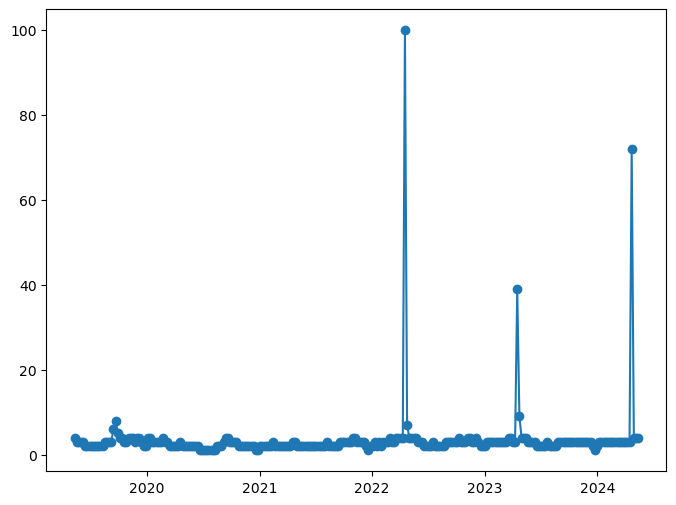

In [35]:
#visualising the data 
plt.figure(figsize = (8,6))
plt.plot(time_series, '-o', label = 'original_data')
plt.show()



## 3) Fitting- AR(p) model

## Steps

1) Using `ar_select_order()` to select the **optimal AR parameter** according to the **AIC** and **BIC**. 

2) Then fitting the **AR** model using `tsa.AutoReg()` and the optimal lag found

3) **Prediction starting at the optimal lag value**. 

4) **Plotting** the resulting prediction and original time series

In [44]:
mod= ar_select_order(time_series, maxlag=10, ic ='aic')
print(mod)
# optlag = max(mod.ar_lags)
if mod.ar_lags is not None:
    
    optlag = mod.ar_lags
    print(f'Optimal p {optlag}')
else:
    print("ar_select_order did not find any valid lags.")
    

# print(f'Optimal p {opt_lags}')

ar_select_order did not find any valid lags.


In [45]:
mod= ar_select_order(time_series, maxlag=10, ic ='bic')
print(mod)
# optlag = max(mod.ar_lags)
if mod.ar_lags is not None:
    
    opt_lag = mod.ar_lags
    print(f'Optimal p {opt_lag}')
else:
    print("ar_select_order did not find any valid lags.")

ar_select_order did not find any valid lags.


In [51]:
ar = AutoReg(data, lags = 3).fit()
pred = ar.predict(start = 3)
print(ar)

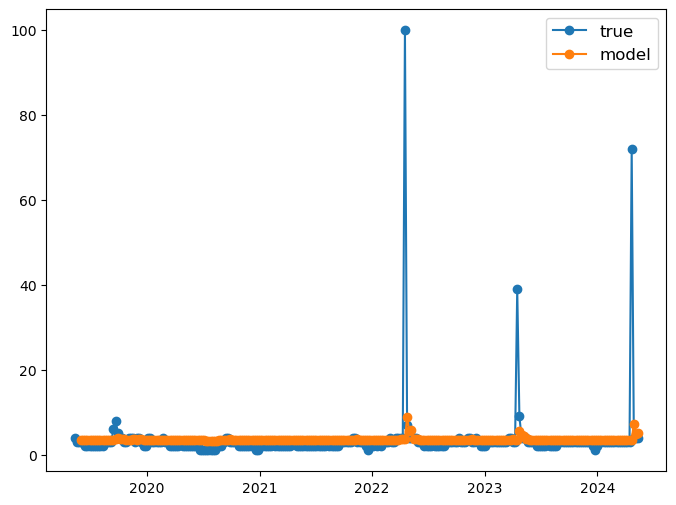

In [52]:
plt.figure(figsize = (8,6))
plt.plot(time_series, '-o', label = 'true')
plt.plot(pred, '-o', label = 'model')
plt.legend(fontsize=12)
# plt.show()

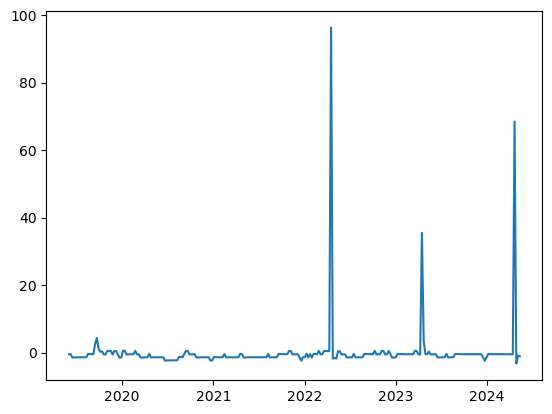

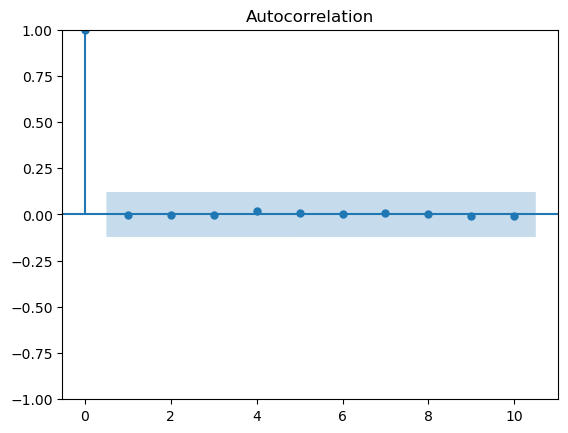

In [54]:
fit_residuals = time_series[3:].values.flatten() - pred
plt.plot(fit_residuals)
plt.show()

plot_acf(fit_residuals, lags=10)
plt.show()

## 4) Forecasting - training and test set split



* **Separate the time series** into a **training set and a test set** formed of the **last 40 points**. 
 
* **Fitting an AR model** on the training data and as we saw above we couldn't find optimal lags, will try again with training data
  
* **Predicting and show the prediction** on the original time series. **Did it do a good job**? 
 
* **Computing the MAE**


In [57]:
#diving data into train and test 

train = time_series[:-40]
test = time_series[-40:]

# choosing the optimal lag for training data 

mod = ar_select_order(train, maxlag = 10, ic = 'bic')

if mod.ar_lags is not None:
      
    optlag = max(mod.ar_lags)
    print(f'Optimal p {optlag}')
else:
    print("ar_select_order did not find any valid lags.")
    


ar_select_order did not find any valid lags.


In [63]:
test.index

DatetimeIndex(['2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03',
               '2023-09-10', '2023-09-17', '2023-09-24', '2023-10-01',
               '2023-10-08', '2023-10-15', '2023-10-22', '2023-10-29',
               '2023-11-05', '2023-11-12', '2023-11-19', '2023-11-26',
               '2023-12-03', '2023-12-10', '2023-12-17', '2023-12-24',
               '2023-12-31', '2024-01-07', '2024-01-14', '2024-01-21',
               '2024-01-28', '2024-02-04', '2024-02-11', '2024-02-18',
               '2024-02-25', '2024-03-03', '2024-03-10', '2024-03-17',
               '2024-03-24', '2024-03-31', '2024-04-07', '2024-04-14',
               '2024-04-21', '2024-04-28', '2024-05-05', '2024-05-12'],
              dtype='datetime64[ns]', freq='W-SUN')

In [73]:
ar = AutoReg(train, lags = 1).fit() 
predictions = ar.predict(end =time_series.index[-1])[-len(test):]
print(predictions)

2023-08-13    3.218194
2023-08-20    3.312580
2023-08-27    3.319893
2023-09-03    3.320459
2023-09-10    3.320503
2023-09-17    3.320507
2023-09-24    3.320507
2023-10-01    3.320507
2023-10-08    3.320507
2023-10-15    3.320507
2023-10-22    3.320507
2023-10-29    3.320507
2023-11-05    3.320507
2023-11-12    3.320507
2023-11-19    3.320507
2023-11-26    3.320507
2023-12-03    3.320507
2023-12-10    3.320507
2023-12-17    3.320507
2023-12-24    3.320507
2023-12-31    3.320507
2024-01-07    3.320507
2024-01-14    3.320507
2024-01-21    3.320507
2024-01-28    3.320507
2024-02-04    3.320507
2024-02-11    3.320507
2024-02-18    3.320507
2024-02-25    3.320507
2024-03-03    3.320507
2024-03-10    3.320507
2024-03-17    3.320507
2024-03-24    3.320507
2024-03-31    3.320507
2024-04-07    3.320507
2024-04-14    3.320507
2024-04-21    3.320507
2024-04-28    3.320507
2024-05-05    3.320507
2024-05-12    3.320507
Freq: W-SUN, dtype: float64


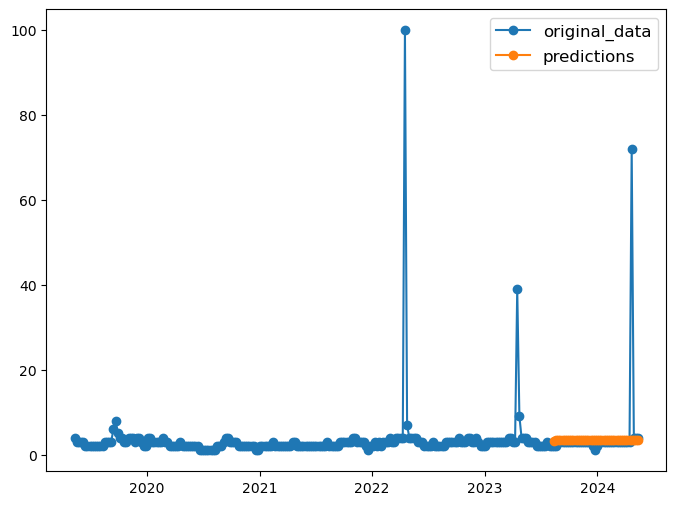

In [74]:
plt.figure(figsize = (8,6))
plt.plot(time_series, '-o', label = 'original_data')
plt.plot(predictions, '-o', label = 'predictions')
plt.legend(fontsize=12)
# plt.show()

In [75]:
print('Out of sample MAE = {0:.3f}'.format(mean_absolute_error(test, predictions)))

Out of sample MAE = 2.204


### ARMA process 
 using `arma_order_select_ic()` to find the optimal parameters.
 Then fitting the **ARIMA** model using `tsa.arima.model.ARIMA()` 


In [77]:
#diving data into train and test 

train = time_series[:-40]
test = time_series[-40:]

# choosing the parameters

param_choice = tsa.arma_order_select_ic(train, ic = 'bic', trend = 'c')
print('ARMA(p,q) =',param_choice['bic_min_order'])


C:\Users\ishfa\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ishfa\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishfa\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARMA(p,q) = (0, 0)


Out of sample MAE = 2.207


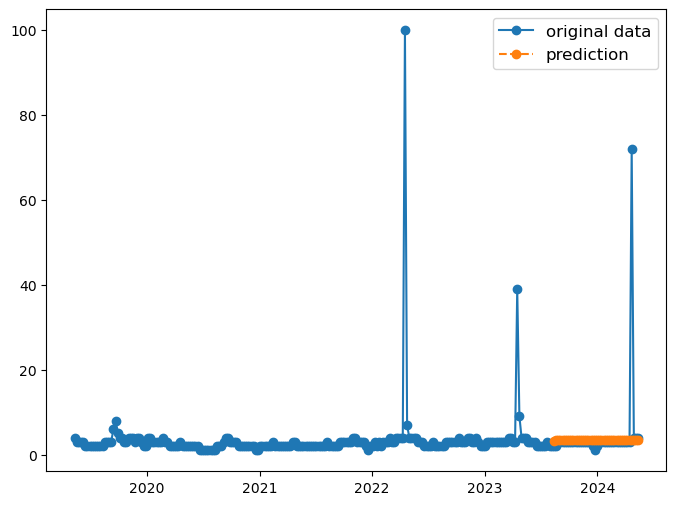

In [85]:
arma = tsa.ARIMA(train, order=(1,0,0))
arma_fit = arma.fit()

start = len(train)
end = len(train) + len(test) - 1
predictions = arma_fit.predict(end =time_series.index[-1])[-len(test):]

plt.figure(figsize=(8, 6))
plt.plot(time_series, '-o', label="original data")
plt.plot(predictions, '--o', label='prediction')

plt.legend(fontsize=12)

# get the MAEs
print('Out of sample MAE = {0:.3f}'.format(mean_absolute_error(test, predictions)))
